## <font color='blue'>Análise Exploratória de Dados em Python Para a Área de Varejo</font>

### O objetivo do projeto é explorar o dataset dado que contém informações da area de varejo de uma empresa, e responder perguntas de negócio.
***

In [98]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px

## Carregando os Dados

In [99]:
# Carrega o dataset
df_dsa = pd.read_csv("..\dados\dataset.csv")

In [100]:
# Shape
df_dsa.shape

(9700, 11)

In [101]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Análise Exploratória

In [102]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [103]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [104]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [105]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [106]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [107]:
# Alterando o tipo de dado da Coluna "Data"
df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'], format='%d/%m/%Y')

In [108]:
# Visualizando
df_dsa.sample(5)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
4872,CA-2015-132864,2015-12-02,KN-16390,Corporate,United States,Columbus,Ohio,TEC-AC-10001267,Technology,Accessories,119.800
4248,CA-2016-155068,2016-10-23,RA-19285,Consumer,United States,Lakeland,Florida,TEC-PH-10004897,Technology,Phones,55.944
9171,CA-2018-119424,2018-06-12,SB-20185,Consumer,United States,Kent,Washington,TEC-PH-10002564,Technology,Phones,71.976
7596,CA-2015-131947,2015-09-17,JA-15970,Consumer,United States,Springfield,Oregon,OFF-PA-10000246,Office Supplies,Paper,40.240
9193,CA-2015-103310,2015-05-10,GM-14680,Consumer,United States,San Jose,California,OFF-PA-10004353,Office Supplies,Paper,39.960


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [109]:
# Visualizando o dataset filtrado para mostrar o valor de venda dos produtos selecionados para cada cidade.
df_dsa[df_dsa['Categoria']=='Office Supplies'].groupby('Cidade')[['Valor_Venda']].sum()

,Valor_Venda
Cidade,
Aberdeen,25.500
Abilene,1.392
Akron,1107.646
Albuquerque,943.122
Alexandria,4879.790
...,...
Woonsocket,142.590
Yonkers,665.964
York,395.920


In [110]:
# Filtrando o dataframe e colocando em ordem decrescente de valor de venda
df_filtrado = df_dsa[df_dsa['Categoria']=='Office Supplies'].groupby('Cidade').agg(
          {'Valor_Venda':'sum'}).reset_index().sort_values('Valor_Venda', ascending=False)

In [111]:
# Visualizando
df_filtrado

,Cidade,Valor_Venda
295,New York City,68362.814
239,Los Angeles,47098.100
392,San Francisco,41771.198
406,Seattle,34856.878
335,Philadelphia,29313.687
...,...,...
316,Ormond Beach,2.808
331,Pensacola,2.214
202,Jupiter,2.064
129,Elyria,1.824


In [112]:
# Localizando a cidade no top 1
resposta_1 = df_filtrado.iloc[0]['Cidade']

print(f'A cidade com a maior venda de produtos para escritório foi {resposta_1}')

A cidade com a maior venda de produtos para escritório foi New York City


## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

In [113]:
# Agrupando as vendas por data do pedido
agrupado_data = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum().reset_index()

In [114]:
# Visualizando
agrupado_data

,Data_Pedido,Valor_Venda
0,2015-01-03,16.4480
1,2015-01-04,288.0600
2,2015-01-05,19.5360
3,2015-01-06,4407.1000
4,2015-01-07,87.1580
...,...,...
1221,2018-12-26,814.5940
1222,2018-12-27,177.6360
1223,2018-12-28,1657.3508
1224,2018-12-29,2915.5340


Usando o [matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)



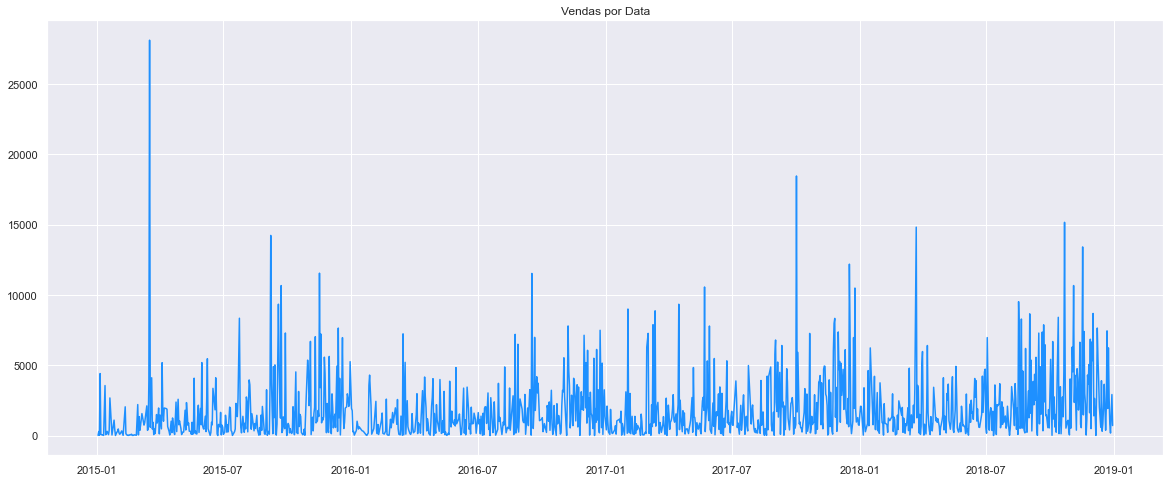

In [115]:
# Plotando o gráfico
plt.figure(figsize=(20,8))
plt.title('Vendas por Data')
plt.plot(agrupado_data['Data_Pedido'], agrupado_data['Valor_Venda'], color = 'dodgerblue')
plt.show()

Usando o [plotly](https://plotly.com/python-api-reference/generated/plotly.express.line)


In [116]:
# Plotando o gráfico interativo
fig = px.line(agrupado_data, x='Data_Pedido', y='Valor_Venda', title='Vendas por Data')
fig.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

In [117]:
# Agrupando o valor de vendas por estado
agrupado_estado = df_dsa.groupby('Estado')['Valor_Venda'].sum().reset_index()

In [118]:
# Visualizando
agrupado_estado.head()

,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980


Usando o barplot do [seaborn](https://seaborn.pydata.org/generated/seaborn.barplot.html)

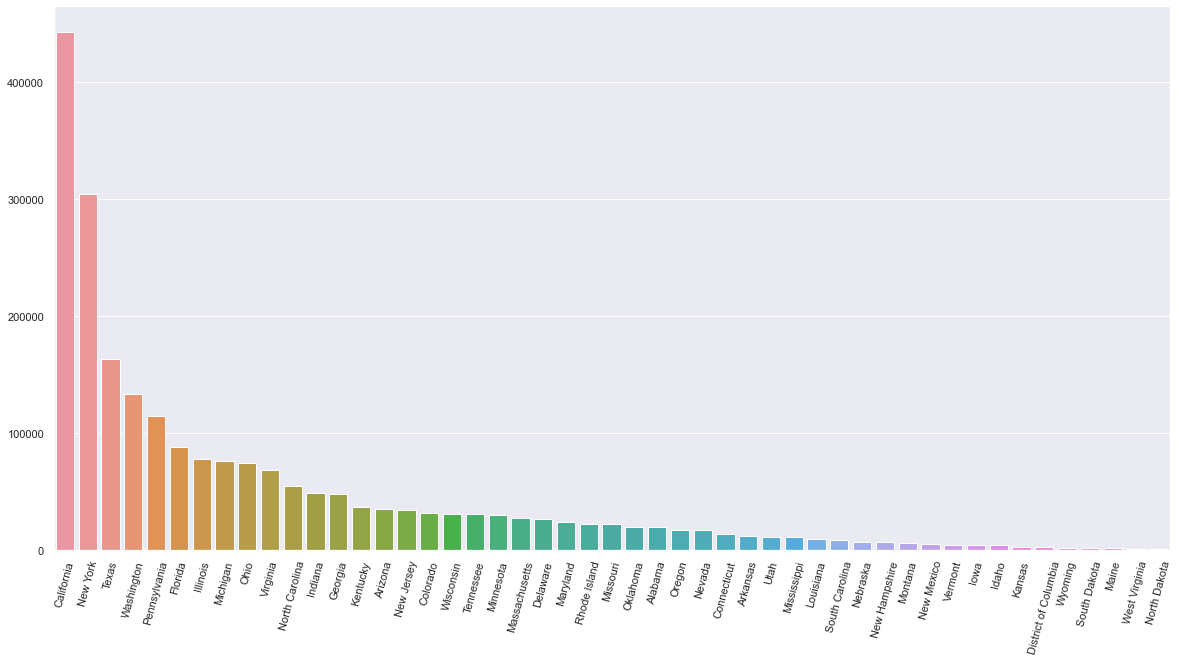

In [119]:
# Plotando um grafico de barras no seaborn para visualizar os dados
plt.figure(figsize=(20,10))
plt.xticks(rotation = 75)
graph = sns.barplot(data=agrupado_estado.sort_values('Valor_Venda', ascending=False), x='Estado', y='Valor_Venda');
graph.set(xlabel=None, ylabel=None);

Usando o [plotly](https://plotly.com/python/bar-charts/)


In [120]:
# Plotando o gráfico interativo
fig = px.bar(agrupado_estado, x='Estado', y='Valor_Venda', title='Vendas por Estado')
fig.update_layout( xaxis_tickangle=-45, title_x=0.5)
fig.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

In [121]:
# Agrupando por cidade
agrupado_cidade = df_dsa.groupby('Cidade')[['Valor_Venda']].sum()

In [122]:
# Visualizando
agrupado_cidade

,Valor_Venda
Cidade,
Aberdeen,25.500
Abilene,1.392
Akron,2724.244
Albuquerque,2220.160
Alexandria,5519.570
...,...
Woonsocket,195.550
Yonkers,7657.666
York,817.978


In [123]:
# Ordenando os valores
ordenados = agrupado_cidade.sort_values('Valor_Venda', ascending=False)

# Criando lista com as top 10 cidades
dez_primeiros = ordenados.iloc[:10]

# Resetando index
dez_primeiros.reset_index(inplace=True)

In [124]:
# Visualizando
dez_primeiros

,Cidade,Valor_Venda
0,New York City,251749.2190
1,Los Angeles,171654.6330
2,Seattle,114725.4780
3,San Francisco,107489.9520
4,Philadelphia,107197.8030
5,Houston,61590.1868
6,San Diego,47458.3790
7,Chicago,46974.3430
8,Jacksonville,44713.1830
9,Detroit,42446.9440


[Text(0.5, 0, ''), Text(0, 0.5, '')]

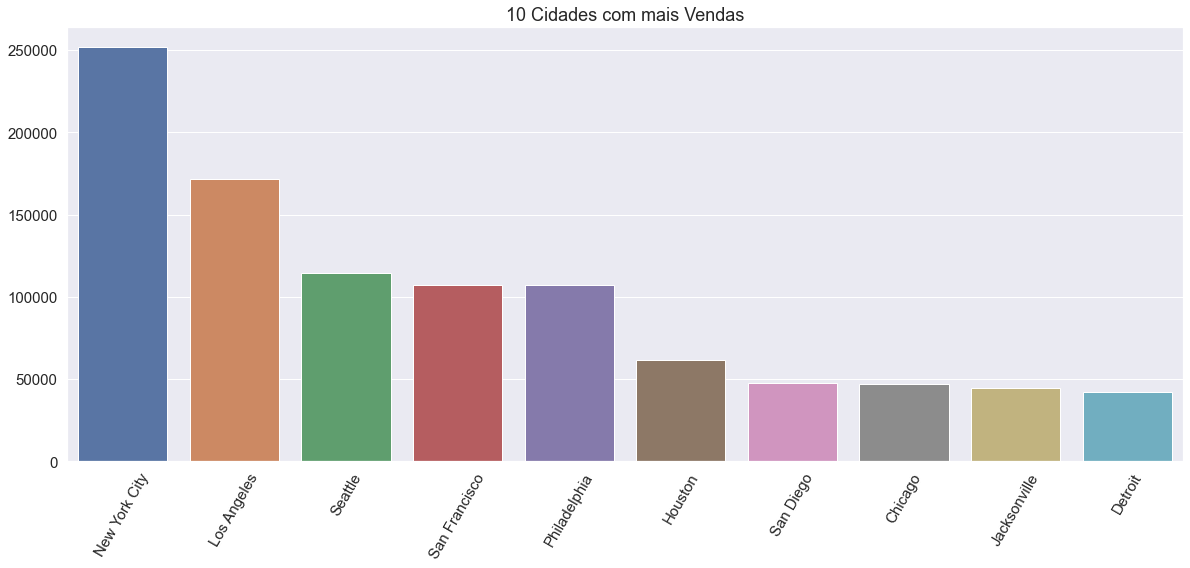

In [125]:
#Plotando o gráfico de barras
plt.figure(figsize=(20,8))
plt.xticks(rotation = 60)
plt.title('10 Cidades com mais Vendas', fontsize=18)
graph1 = sns.barplot(data=dez_primeiros, x='Cidade', y='Valor_Venda');
graph1.tick_params(labelsize=15)
graph1.set(xlabel=None, ylabel=None)

Usando Stylebar do [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.bar.html)

In [126]:
# Outra visualização do dataframe
dez_primeiros.style.bar(subset='Valor_Venda', color='royalblue')

,Cidade,Valor_Venda
0,New York City,251749.219000
1,Los Angeles,171654.633000
2,Seattle,114725.478000
3,San Francisco,107489.952000
4,Philadelphia,107197.803000
5,Houston,61590.186800
6,San Diego,47458.379000
7,Chicago,46974.343000
8,Jacksonville,44713.183000
9,Detroit,42446.944000


## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?


In [127]:
# Agrupando por segmento e ordenando os valores
agrupado_segmento = df_dsa.groupby('Segmento')[['Valor_Venda']].sum().sort_values('Valor_Venda', ascending=False).reset_index()

In [128]:
# Visualizando
agrupado_segmento

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [129]:
#Printando o top 1
print(f'O Segmento com maior total de vendas foi: {agrupado_segmento.iloc[0].tolist()[0]}')

O Segmento com maior total de vendas foi: Consumer


Usando [matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html)

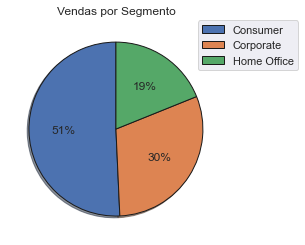

In [130]:
#Plotando o grafico de pizza
plt.pie(agrupado_segmento['Valor_Venda'], 
        autopct='%1.0f%%', shadow=True, startangle=90, 
        wedgeprops = { 'linewidth': 1, "edgecolor" :"k" })
plt.title('Vendas por Segmento')
plt.legend(agrupado_segmento['Segmento'].tolist(), 
            bbox_to_anchor=(0.85,1.025), loc="upper left");

Usando o [plotly](https://plotly.com/python/pie-charts/)


In [131]:
# Plotando o gráfico interativo
fig = px.pie(agrupado_segmento, values='Valor_Venda', title='Vendas por Segmento', hole=0.6)
fig.update_layout(title_x=0.5)
fig.show()

## Pergunta de Negócio 6:

### Qual o Total de Vendas Por Segmento e Por Ano?

In [132]:
# Agrupando o Valor de Venda por Segmento e Data
agrupado_seg_date = df_dsa.groupby(['Segmento', 'Data_Pedido'])[['Valor_Venda']].sum().reset_index()


# Substituindo Data por apenas Ano, e renomeando a coluna
agrupado_seg_date['Data_Pedido'] = agrupado_seg_date['Data_Pedido'].dt.year

agrupado_seg_date = agrupado_seg_date.rename(columns={'Data_Pedido':'Ano'})


# Resetando index e ordenando por ano.
agrupado_seg_date = agrupado_seg_date.groupby(['Ano','Segmento'])[['Valor_Venda']].sum().reset_index()
agrupado_seg_date

,Ano,Segmento,Valor_Venda
0,2015,Consumer,256719.9166
1,2015,Corporate,125819.5957
2,2015,Home Office,88229.0878
3,2016,Consumer,265295.2593
4,2016,Corporate,114643.1229
5,2016,Home Office,74134.1332
6,2017,Consumer,288459.5572
7,2017,Corporate,203266.7398
8,2017,Home Office,103639.6270
9,2018,Consumer,323359.6019


Usando o [plotly](https://plotly.com/python/sunburst-charts/)

In [133]:
# Plotando o sunburst para visualizar as vendas por ano e segmento
fig = px.sunburst(agrupado_seg_date, path=['Ano', 'Segmento'], values='Valor_Venda', title='Vendas por Ano e Segmento')
fig.update_layout(title_x=0.5)
fig.show()

c:\Users\danie\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\danie\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



## Pergunta de Negócio 7:

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [134]:
# Filtrando valores de venda e calculando 
df_15pct = df_dsa[df_dsa['Valor_Venda']>1000]

print(f'O número de vendas com 15% de desconto será: {len(df_15pct)}')

O número de vendas com 15% de desconto será: 457


## Pergunta de Negócio 8:

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [135]:
# Utilizando o dataframe criado na pergunta anterior,
# Calcularemos as médias do valor de venda antes e depois de aplicar a função lambda de desconto

media_antes = df_15pct['Valor_Venda'].mean()

media_depois = df_15pct['Valor_Venda'].apply(lambda x: x*0.85).mean()


print(f'''
Média antes do desconto: {media_antes:.2f}
Média após desconto: {media_depois:.2f}
        ''')


Média antes do desconto: 2116.81
Média após desconto: 1799.29
        


## Pergunta de Negócio 9:

### Qual a Média de Vendas Por Segmento, Por Ano e Por Mês?

In [136]:
#Adicionando duas novas colunas, mês e ano
df_dsa['Ano'] = df_dsa['Data_Pedido'].dt.year
df_dsa['Mes'] = df_dsa['Data_Pedido'].dt.month
df_dsa.sample(5)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Mes
7314,CA-2018-158120,2018-11-17,KH-16330,Corporate,United States,Hillsboro,Oregon,OFF-PA-10003205,Office Supplies,Paper,19.608,2018,11
5482,CA-2015-107573,2015-12-12,PB-19150,Consumer,United States,Miami,Florida,OFF-EN-10001099,Office Supplies,Envelopes,23.472,2015,12
3322,CA-2016-120810,2016-07-23,TH-21550,Home Office,United States,New York City,New York,OFF-AP-10002892,Office Supplies,Appliances,68.940,2016,7
9412,CA-2016-127824,2016-10-18,JC-15775,Consumer,United States,Seattle,Washington,OFF-PA-10001184,Office Supplies,Paper,17.940,2016,10
6882,CA-2018-123036,2018-09-10,HA-14905,Consumer,United States,Springfield,Ohio,TEC-AC-10003499,Technology,Accessories,37.056,2018,9


In [137]:
#Agrupando por segmento e data, e calculando a média de vendas
df_dsa_pergunta9 = df_dsa.groupby(['Segmento', 'Ano', 'Mes'])['Valor_Venda'].agg([np.mean]).reset_index()

In [138]:
# Visualizando
df_dsa_pergunta9 

,Segmento,Ano,Mes,mean
0,Consumer,2015,1,146.736787
1,Consumer,2015,2,117.327926
2,Consumer,2015,3,152.170564
3,Consumer,2015,4,189.762750
4,Consumer,2015,5,191.337439
...,...,...,...,...
139,Home Office,2018,8,176.160606
140,Home Office,2018,9,249.140597
141,Home Office,2018,10,412.576597
142,Home Office,2018,11,247.519423


In [139]:
#Separando os dados para plotar
segmento = df_dsa_pergunta9['Segmento']
ano = df_dsa_pergunta9['Ano']
mes = df_dsa_pergunta9['Mes']

Plotando os gráficos relacionais no [seaborn](https://seaborn.pydata.org/generated/seaborn.relplot.html)



<Figure size 864x432 with 0 Axes>

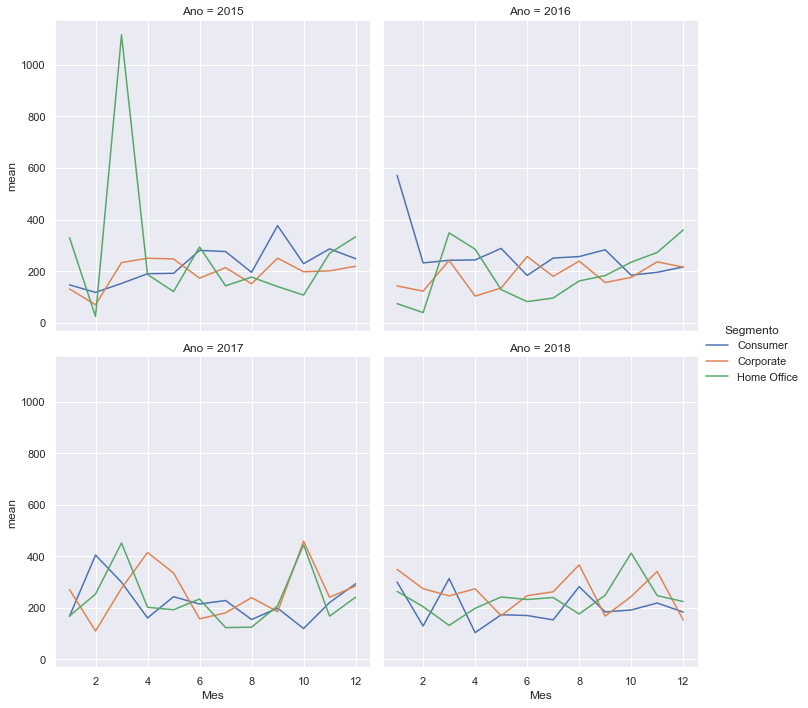

In [140]:
# Plot
plt.figure(figsize = (12, 6))
sns.set()
fig1 = sns.relplot(kind = 'line',
                   data = df_dsa_pergunta9, 
                   y = 'mean', 
                   x = mes,
                   hue = segmento, 
                   col = ano,
                   col_wrap = 2)
plt.show()

## Pergunta de Negócio 10:

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

In [141]:
#Agrupando as vendas por subcategoria em ordem decrescente
df_subcat = df_dsa.groupby(['SubCategoria'])[['Valor_Venda']].sum().reset_index().sort_values('Valor_Venda', ascending=False)

In [142]:
# Visualizando
df_subcat

,SubCategoria,Valor_Venda
13,Phones,325271.2940
5,Chairs,317919.6250
14,Storage,216188.3620
16,Tables,202083.3600
3,Binders,194723.3810
11,Machines,189238.6310
0,Accessories,162791.3620
6,Copiers,146248.0940
4,Bookcases,108045.0467
1,Appliances,104061.6930


In [143]:
# Selecionando as top 12 categorias
top12 = df_subcat['Valor_Venda'].iloc[:12]

In [144]:
# Visualizando
top12

13    325271.2940
5     317919.6250
14    216188.3620
16    202083.3600
3     194723.3810
11    189238.6310
0     162791.3620
6     146248.0940
4     108045.0467
1     104061.6930
9      88862.7700
12     76312.7640
Name: Valor_Venda, dtype: float64

In [145]:
# Armazenando o valor de venda do top 12 em uma lista
top12=top12.tolist()

In [146]:
# Agrupando as vendas novamente, por categoria e subcategoria
df_cat_subcat = df_dsa.groupby(['Categoria','SubCategoria'])[['Valor_Venda']].sum().reset_index()

In [147]:
# Visualizando 
df_cat_subcat

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Bookcases,108045.0467
1,Furniture,Chairs,317919.6250
2,Furniture,Furnishings,88862.7700
3,Furniture,Tables,202083.3600
4,Office Supplies,Appliances,104061.6930
5,Office Supplies,Art,26573.7360
6,Office Supplies,Binders,194723.3810
7,Office Supplies,Envelopes,15791.1820
8,Office Supplies,Fasteners,3001.9600
9,Office Supplies,Labels,12267.3660


In [148]:
# Filtrando o dataframe para incluir apenas o top 12, e ordenando por categoria e valor
df_cat_subcat = df_cat_subcat[df_cat_subcat['Valor_Venda'].isin(top12)].sort_values('Valor_Venda', ascending=False).sort_values('Categoria')

In [149]:
# Visualizando
df_cat_subcat

,Categoria,SubCategoria,Valor_Venda
1,Furniture,Chairs,317919.6250
3,Furniture,Tables,202083.3600
0,Furniture,Bookcases,108045.0467
2,Furniture,Furnishings,88862.7700
11,Office Supplies,Storage,216188.3620
6,Office Supplies,Binders,194723.3810
4,Office Supplies,Appliances,104061.6930
10,Office Supplies,Paper,76312.7640
16,Technology,Phones,325271.2940
15,Technology,Machines,189238.6310


***
- **Buscando uma forma de otimizar o agrupamento e filtro acima**

In [150]:
# Agrupando por Categoria e Subcategoria, e filtrando pelos 12 maiores Valores de Venda
df_cat_subcat_2 = df_dsa.groupby(['Categoria',
                                'SubCategoria'])[['Valor_Venda']].sum().reset_index().sort_values('Valor_Venda', ascending=False).head(12)

# Ordenando por Categoria
df_cat_subcat_2.sort_values('Categoria')

,Categoria,SubCategoria,Valor_Venda
1,Furniture,Chairs,317919.6250
3,Furniture,Tables,202083.3600
0,Furniture,Bookcases,108045.0467
2,Furniture,Furnishings,88862.7700
11,Office Supplies,Storage,216188.3620
6,Office Supplies,Binders,194723.3810
4,Office Supplies,Appliances,104061.6930
10,Office Supplies,Paper,76312.7640
16,Technology,Phones,325271.2940
15,Technology,Machines,189238.6310


***

In [151]:
#Criando o dataframe das categorias para plotar em conjunto
df_cat = df_cat_subcat.groupby(['Categoria'])[['Valor_Venda']].sum().reset_index()

In [152]:
# Visualizando
df_cat

,Categoria,Valor_Venda
0,Furniture,716910.8017
1,Office Supplies,591286.2000
2,Technology,823549.3810


In [153]:
# Função para auto percentage
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

In [154]:
# Cores das Categorias
cor_cat = ['turquoise', 'mediumorchid', 'tomato']

In [155]:
# Cores das SubCategorias
cor_subcat = ['turquoise', 'turquoise', 'turquoise', 'turquoise',
              'mediumorchid', 'mediumorchid', 'mediumorchid', 'mediumorchid', 
              'tomato', 'tomato', 'tomato', 'tomato']

Construção de gráficos de pizza concentricos com [matplotlib](https://stackoverflow.com/questions/67210640/how-can-i-draw-a-nested-pie-graph-in-matplotlib-in-python)



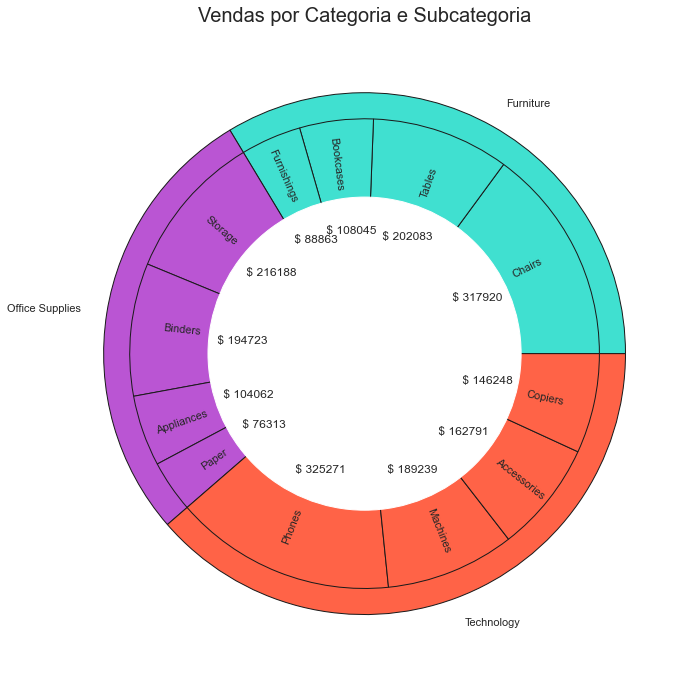

In [156]:
# Plot dos gráficos de piza concentricos

# Tamanho da figura
fig, ax = plt.subplots(figsize = (18,12))

# Gráfico das categorias
p1 = ax.pie(df_cat['Valor_Venda'], 
            radius = 1,
            labels = df_cat['Categoria'],
            wedgeprops = { 'linewidth': 1, "edgecolor" :"k" },
            colors = cor_cat)

# Gráfico das subcategorias
p2 = ax.pie(df_cat_subcat['Valor_Venda'],
            radius = 0.9,
            labels = df_cat_subcat['SubCategoria'],
            autopct= autopct_format(df_cat_subcat['Valor_Venda']),
            colors = cor_subcat,
            labeldistance = 0.7,
            wedgeprops = { 'linewidth': 1, "edgecolor" :"k" }, 
            pctdistance = 0.53,
            rotatelabels = True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Detalhes
plt.title('Vendas por Categoria e Subcategoria', fontsize=20)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

***
***